In [1]:
!pip install -q datascience
!pip install -q pandas-profiling
!pip install -q yellowbrick

In [2]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

In [3]:
!pip install -q pydotplus

In [40]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.ensemble import RandomForestClassifier                 # To implement random forest classifier
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
from sklearn.linear_model import LogisticRegression
import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [70]:
# Load the data
data = pd.read_csv(r"C://Meadha/INSAID_Project/Project_ML_Advance/Project-5-Classification-Seattle-Weather-Prediction/seattle_train.csv")
#data = pd.read_csv("seattle_train.csv")
# Get the dimesions of data
print('Shape of the dataset:', data.shape)

# Output first 5 data rows
data.head()

Shape of the dataset: (20440, 6)


,Id,DATE,PRCP,TMAX,TMIN,RAIN
0,0,1948-01-01,0.47,51,42,True
1,1,1948-01-02,0.59,45,36,True
2,2,1948-01-03,0.42,45,35,True
3,3,1948-01-04,0.31,45,34,True
4,4,1948-01-05,0.17,45,32,True


In [71]:
duplicate= data[data.duplicated()]
print("Duplicate Rows :")

Duplicate Rows :


In [72]:
data.describe()

,Id,PRCP,TMAX,TMIN
count,20440.000000,20438.000000,20440.000000,20440.000000
mean,10219.500000,0.104860,59.301027,44.187965
std,5900.664087,0.235564,12.700363,8.832697
min,0.000000,0.000000,4.000000,0.000000
25%,5109.750000,0.000000,50.000000,38.000000
50%,10219.500000,0.000000,58.000000,44.000000
75%,15329.250000,0.100000,69.000000,51.000000
max,20439.000000,5.020000,100.000000,69.000000


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20440 entries, 0 to 20439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      20440 non-null  int64  
 1   DATE    20440 non-null  object 
 2   PRCP    20438 non-null  float64
 3   TMAX    20440 non-null  int64  
 4   TMIN    20440 non-null  int64  
 5   RAIN    20438 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 958.2+ KB


In [74]:
data=data.dropna(axis=0, subset=['PRCP','RAIN'])

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20438 entries, 0 to 20439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      20438 non-null  int64  
 1   DATE    20438 non-null  object 
 2   PRCP    20438 non-null  float64
 3   TMAX    20438 non-null  int64  
 4   TMIN    20438 non-null  int64  
 5   RAIN    20438 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ MB


In [81]:
data["RAIN"] = data["RAIN"].astype('uint8')
data.dtypes

Id        int64
DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN      uint8
dtype: object

In [82]:
data.head()

,Id,DATE,PRCP,TMAX,TMIN,RAIN
0,0,1948-01-01,0.47,51,42,1
1,1,1948-01-02,0.59,45,36,1
2,2,1948-01-03,0.42,45,35,1
3,3,1948-01-04,0.31,45,34,1
4,4,1948-01-05,0.17,45,32,1


In [78]:
# Instatiatig input and output data by dropping unnecessary data features
X = data.drop(['Id','DATE'], axis=1)
y = data['RAIN'].astype('uint8')

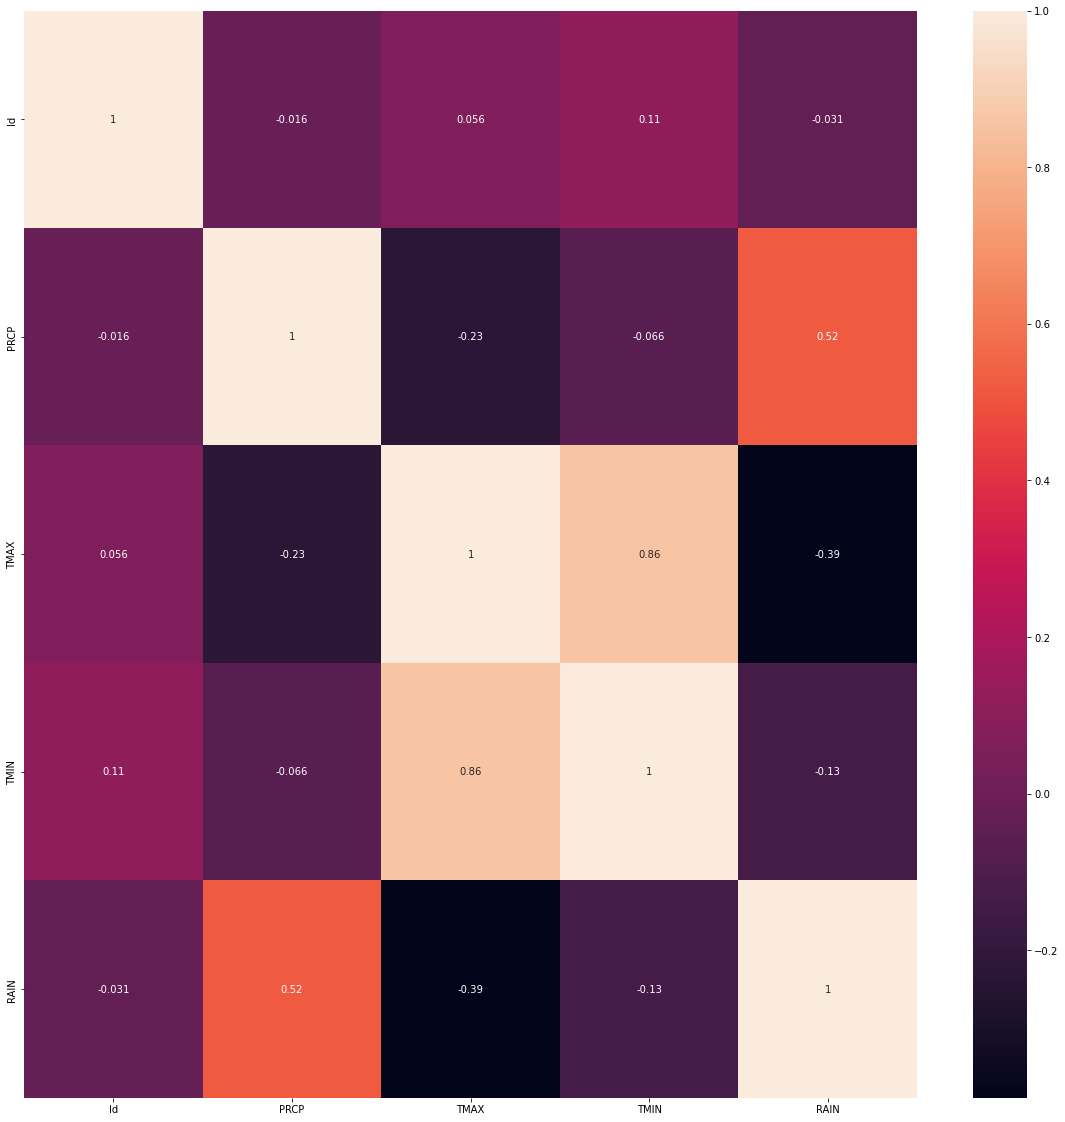

In [83]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, ax=ax );

In [84]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RAIN, dtype: uint8

In [85]:
X.head()

,PRCP,TMAX,TMIN,RAIN
0,0.47,51,42,True
1,0.59,45,36,True
2,0.42,45,35,True
3,0.31,45,34,True
4,0.17,45,32,True


In [86]:
# Instatiate a scaler object and performing transformation on Precipitation, TMAX and TMIN
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['PRCP', 'TMAX','TMIN']])
data2 = pd.DataFrame(data=scaled_data, columns=['PRCP', 'TMAX','TMIN'])
data2.head(2)

,PRCP,TMAX,TMIN
0,1.550103,-0.653535,-0.247633
1,2.059531,-1.125966,-0.926934


In [87]:
finalX = data2
finalX.head()

,PRCP,TMAX,TMIN
0,1.550103,-0.653535,-0.247633
1,2.059531,-1.125966,-0.926934
2,1.337842,-1.125966,-1.040151
3,0.870866,-1.125966,-1.153367
4,0.276534,-1.125966,-1.379801


In [88]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(finalX, y, test_size=0.20, random_state=42, stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (16350, 3)
y_train shape:  (16350,)
X_test shape:  (4088, 3)
y_test shape:  (4088,)


In [89]:
y_train

12489    1
20434    1
4619     1
15585    0
20052    0
15486    0
19517    1
8272     0
16984    1
10536    0
17365    0
18572    0
13311    0
11530    0
2608     0
19138    0
19769    0
17556    1
4617     0
19474    0
1408     1
7949     0
2163     1
8504     0
1708     0
4269     0
19645    1
16291    0
16890    0
18814    0
16229    0
12642    0
6800     0
13692    0
7628     0
11497    0
13280    1
18246    1
11432    0
10296    1
20098    0
5049     1
10747    1
3590     1
1138     0
523      0
3026     0
2804     0
1974     0
20399    1
19203    0
3475     0
19801    1
4187     0
4861     1
4514     1
3401     0
10035    1
350      0
17640    1
4897     1
4313     1
19475    1
13541    0
10723    0
19143    1
14317    1
16928    0
5853     0
11594    0
19254    1
9101     1
8062     1
16135    1
10140    0
876      1
18705    0
2768     1
13470    1
13260    0
16098    1
19082    0
15303    1
6135     0
7768     0
11590    0
16239    0
18827    0
15165    0
3741     1
16960    0

In [90]:
y_test.head()

3838     0
1593     1
1025     0
10721    0
12665    1
Name: RAIN, dtype: uint8

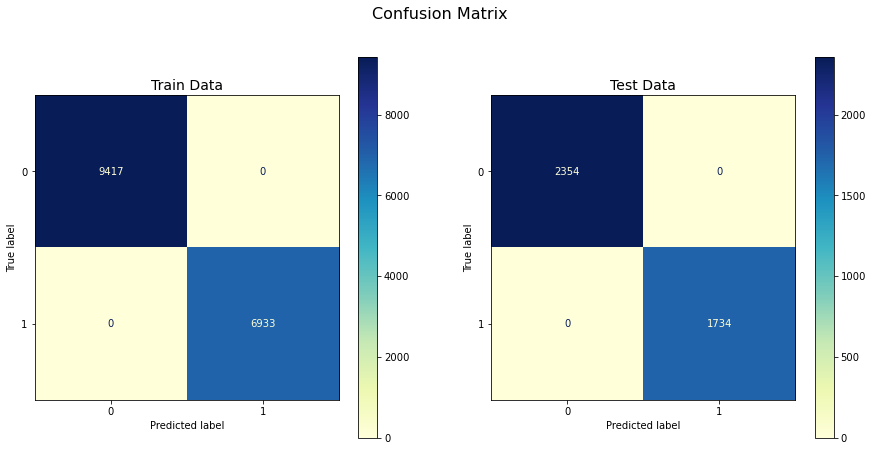

In [91]:
# Instantiate a random forest classifier
clf = RandomForestClassifier(random_state=42,class_weight='balanced')
clf.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count = clf.predict(X_train)
y_test_pred_count = clf.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=clf, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [92]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9417
           1       1.00      1.00      1.00      6933

    accuracy                           1.00     16350
   macro avg       1.00      1.00      1.00     16350
weighted avg       1.00      1.00      1.00     16350

                    Testing Report           
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2354
           1       1.00      1.00      1.00      1734

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



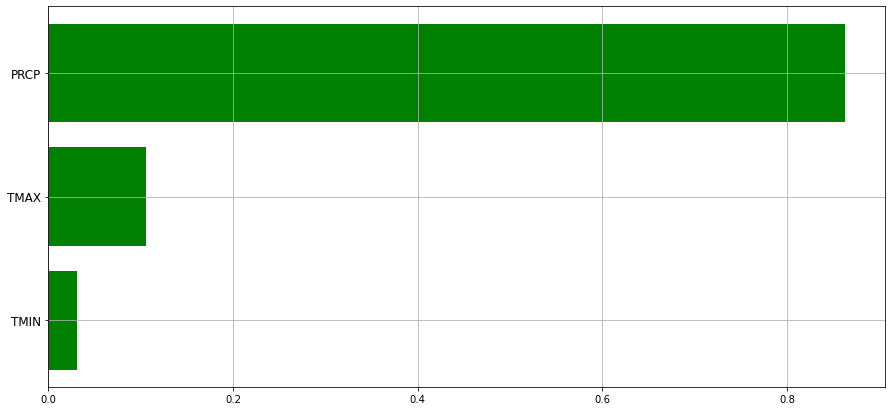

In [93]:
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=[15, 7])
plt.barh(y=range(len(indices)), width=importances[indices], color='g', align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=12)
plt.grid(b=True)
plt.show()

In [94]:
df = pd.read_csv("C://Meadha/INSAID_Project/Project_ML_Advance/Project-5-Classification-Seattle-Weather-Prediction/seattle_test.csv")
#df = pd.read_csv("seattle_test.csv")
print(df)

         Id        DATE  PRCP  TMAX  TMIN
0     20440  2003-12-18  0.00    54    37
1     20441  2003-12-19  0.14    51    38
2     20442  2003-12-20  0.13    48    44
3     20443  2003-12-21  0.01    51    38
4     20444  2003-12-22  0.00    53    35
5     20445  2003-12-23  0.00    50    43
6     20446  2003-12-24  0.42    50    42
7     20447  2003-12-25  0.00    43    37
8     20448  2003-12-26  0.00    39    34
9     20449  2003-12-27  0.27    42    32
10    20450  2003-12-28  0.00    38    31
11    20451  2003-12-29  0.00    39    27
12    20452  2003-12-30  0.12    34    25
13    20453  2003-12-31  0.19    37    30
14    20454  2004-01-01  0.27    37    30
15    20455  2004-01-02  0.04    36    32
16    20456  2004-01-03  0.02    36    23
17    20457  2004-01-04  0.00    27    20
18    20458  2004-01-05  0.00    26    20
19    20459  2004-01-06  0.54    31    22
20    20460  2004-01-07  0.65    39    30
21    20461  2004-01-08  0.22    47    37
22    20462  2004-01-09  0.15    5

In [95]:
df_final=df.drop(['Id','DATE'],axis=1)

In [96]:
df_final.head()

,PRCP,TMAX,TMIN
0,0.00,54,37
1,0.14,51,38
2,0.13,48,44
3,0.01,51,38
4,0.00,53,35


In [97]:
##scaler1 = StandardScaler()
scaled_data1 = scaler.transform(df_final[['PRCP', 'TMAX','TMIN']])
data3 = pd.DataFrame(data=scaled_data1, columns=['PRCP', 'TMAX','TMIN'])
data3.head(2)

,PRCP,TMAX,TMIN
0,-0.445155,-0.417320,-0.813717
1,0.149177,-0.653535,-0.700500


In [98]:
y_actual_test_pred_count = clf.predict(data3)

In [99]:
data = {'Id':df.Id,'RAIN':y_actual_test_pred_count}
df_test = pd.DataFrame(data)
df_test['RAIN'].replace({0:'FALSE',1:'TRUE'},inplace=True)
df_test.head()

,Id,RAIN
0,20440,FALSE
1,20441,TRUE
2,20442,TRUE
3,20443,TRUE
4,20444,FALSE


In [100]:
df_test.to_csv('test_result.csv')

PermissionError: [Errno 13] Permission denied: 'test_result.csv'